In [6]:
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import os 
import  numpy as np

In [9]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    return 0.001 * (0.9 ** epoch)

lr_scheduler = LearningRateScheduler(lr_schedule)


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [29]:
# train=ImageDataGenerator(rescale=1/255)
# # validation=ImageDataGenerator(rescale=1/255)
# image_gen_train = ImageDataGenerator(     
#       rescale=1/255,
#       horizontal_flip=True,
#       fill_mode='nearest')
image_gen_train = ImageDataGenerator(
    rescale=1/255,
    horizontal_flip=True,
    fill_mode='nearest',
    rotation_range=40,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

In [30]:
# train_dataset = train.flow_from_directory('MAIN_FILE/training/',
#                                           target_size=(200, 200),
#                                           batch_size=4,
#                                           class_mode='categorical')

# validation_dataset = validation.flow_from_directory('MAIN_FILE/validation/',
#                                                     target_size=(200, 200),
#                                                     batch_size=4,
#                                                     class_mode='categorical')

train_data_gen = image_gen_train.flow_from_directory('MAIN_FILE/training/',
                                                     batch_size=5,  
                                                     shuffle=True,
                                                     target_size=(200,200),
                                                     class_mode='categorical')

validation_data_gen = image_gen_train.flow_from_directory('MAIN_FILE/validation/',
                                                     batch_size=5,  
                                                     shuffle=True,
                                                     target_size=(200,200),
                                                     class_mode='categorical')

Found 9600 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [31]:
train_data_gen.class_indices

{'G': 0, 'M': 1, 'NO': 2, 'P': 3}

In [32]:
validation_data_gen.class_indices

{'G': 0, 'M': 1, 'N': 2, 'P': 3}

In [33]:
train_data_gen.classes

array([0, 0, 0, ..., 3, 3, 3])

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [35]:
# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',  # For multi-class classification
#               metrics=['accuracy'])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 batch_normalization_3 (Bat  (None, 198, 198, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                      

In [42]:
# model_fit = model.fit(train_data_gen,
# steps_per_epoch = 10,
# epochs= 100,
# validation_data= validation_data_gen)
# model_fit = model.fit(
#     train_data_gen,
#     steps_per_epoch=10,
#     epochs=100,
#     validation_data=validation_data_gen,
#     callbacks=[lr_scheduler]
# )
# from sklearn.utils.class_weight import compute_class_weight

# # Assuming you have three classes (0, 1, 2), adjust accordingly
# class_labels = np.unique(train_data_gen.classes)
# class_weights = compute_class_weight('balanced', class_labels, train_data_gen.classes)

# class_weight_dict = dict(zip(class_labels, class_weights))

# model_fit = model.fit(
#     train_data_gen,
#     steps_per_epoch=10,
#     epochs=100,
#     validation_data=validation_data_gen,
#     callbacks=[lr_scheduler, early_stopping],
#     class_weight=class_weight_dict
# )

# from sklearn.utils.class_weight import compute_class_weight

# # Assuming you have three classes (0, 1, 2), adjust accordingly
# class_labels = np.unique(train_data_gen.classes)
# class_counts = np.bincount(train_data_gen.classes)
# class_weights = compute_class_weight('balanced', class_labels, train_data_gen.classes)

# # Manually compute class weights
# class_weight_dict = dict(zip(class_labels, class_counts / class_weights))

# model_fit = model.fit(
#     train_data_gen,
#     steps_per_epoch=10,
#     epochs=100,
#     validation_data=validation_data_gen,
#     callbacks=[lr_scheduler, early_stopping],
#     class_weight=class_weight_dict
# )
# from sklearn.utils.class_weight import compute_class_weight

# # Assuming you have three classes (0, 1, 2), adjust accordingly
# class_labels = np.unique(train_data_gen.classes)
# class_counts = np.bincount(train_data_gen.classes)
# class_weights = compute_class_weight('balanced', class_labels, train_data_gen.classes)

# # Manually compute class weights based on inverse class frequencies
# class_weight_dict = dict(zip(class_labels, 1.0 / class_weights))

# model_fit = model.fit(
#     train_data_gen,
#     steps_per_epoch=10,
#     epochs=100,
#     validation_data=validation_data_gen,
#     callbacks=[lr_scheduler, early_stopping],
#     class_weight=class_weight_dict
# )
from sklearn.utils.class_weight import compute_class_weight

# Convert class labels from the generator to a NumPy array
train_labels = np.array(train_data_gen.classes)

# Assuming you have three classes (0, 1, 2), adjust accordingly

model_fit = model.fit(
    train_data_gen,
    steps_per_epoch=10,
    epochs=100,
    validation_data=validation_data_gen,
    callbacks=[lr_scheduler, early_stopping]
)


Epoch 1/100
10/10 [==============================] - 6s 631ms/step - loss: 3.3893 - accuracy: 0.2000 - val_loss: 1.5267 - val_accuracy: 0.2583 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 6s 600ms/step - loss: 2.6809 - accuracy: 0.3000 - val_loss: 1.4756 - val_accuracy: 0.3167 - lr: 9.0000e-04
Epoch 3/100
10/10 [==============================] - 6s 606ms/step - loss: 2.7038 - accuracy: 0.2800 - val_loss: 1.7831 - val_accuracy: 0.2333 - lr: 8.1000e-04
Epoch 4/100
10/10 [==============================] - 6s 608ms/step - loss: 1.7552 - accuracy: 0.3800 - val_loss: 2.1221 - val_accuracy: 0.2417 - lr: 7.2900e-04
Epoch 5/100
10/10 [==============================] - 6s 597ms/step - loss: 1.7182 - accuracy: 0.3800 - val_loss: 2.5878 - val_accuracy: 0.2500 - lr: 6.5610e-04
Epoch 6/100
10/10 [==============================] - 6s 605ms/step - loss: 2.1902 - accuracy: 0.2600 - val_loss: 3.6447 - val_accuracy: 0.2500 - lr: 5.9049e-04
Epoch 7/100
10/10 [=========================

In [1]:
fig1 = plt.gcf()
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

NameError: name 'plt' is not defined

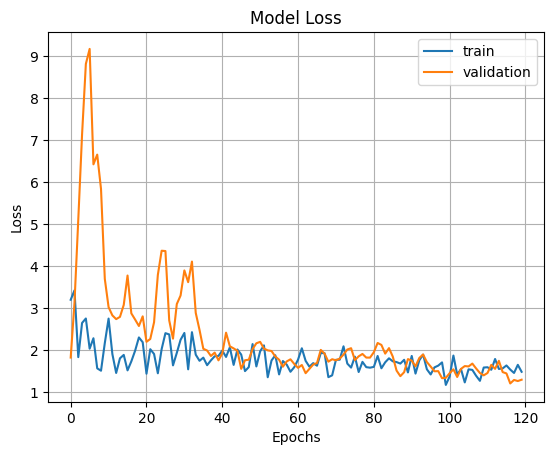

In [21]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

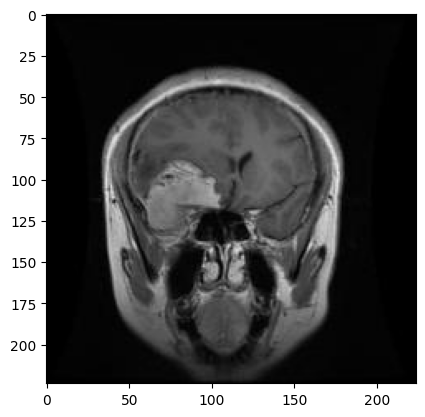

In [22]:
img=image.load_img('MAIN_FILE/testing/M/M_25_HF_.jpg');
plt.imshow(img)

In [23]:
from PIL import Image
import numpy as np

# Open the image using PIL
image = Image.open('MAIN_FILE/testing/N/N_425_SP_.jpg');

# Convert the PIL image to a NumPy array
image_array = np.array(image)

# Get the shape of the NumPy array
height, width, channels = image_array.shape

# Define the desired width and height for resizing
desired_width, desired_height = 200, 200

# Resize the image using OpenCV or PIL
# For OpenCV:
resized_image = cv2.resize(image_array, (desired_width, desired_height))
# For PIL (Pillow):
# resized_image = image.resize((desired_width, desired_height))


In [24]:


# Assuming 'resized_image' is your input data with shape (200, 200, 3)
# Add batch dimension to the image
input_data = np.expand_dims(resized_image, axis=0)

# Perform prediction
predictions = model.predict(input_data)

# Get the index of the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

# Check the predicted class and print the corresponding label
if predicted_class == 0:
    print('G')
elif predicted_class == 1:
    print('M')
elif predicted_class == 2:
    print('NO')
elif predicted_class == 3:
    print('P')


1/1 [==============================] - 1s 1s/step
M


40/40 [==============================] - 3s 76ms/step


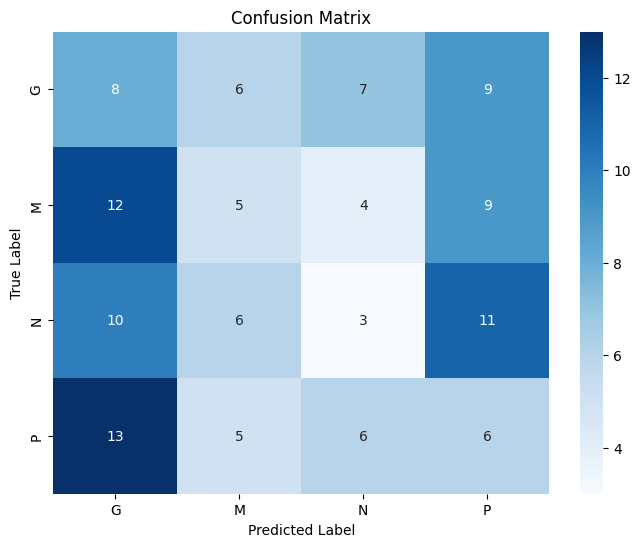

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels from the validation dataset generator
true_labels = validation_data_gen.classes

# Predict labels for the validation dataset
predicted_labels = model.predict(validation_data_gen)

# Get the index of the class with the highest probability for each prediction
predicted_classes = np.argmax(predicted_labels, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_classes)

# Visualize the confusion matrix using a heatmap
class_names = list(validation_data_gen.class_indices.keys())
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [18]:
from sklearn.metrics import precision_score

# Get the true labels from the validation dataset generator
true_labels = validation_dataset.classes

# Get the predicted labels (class indices) from the model
predicted_labels = np.argmax(model.predict(validation_dataset), axis=1)

# Calculate precision for each class
precision = precision_score(true_labels, predicted_labels, average=None)

# Print precision for each class
class_names = list(validation_dataset.class_indices.keys())
for i, class_name in enumerate(class_names):
    print(f'Precision for class {class_name}: {precision[i]}')

30/30 [==============================] - 1s 34ms/step
Precision for class G: 0.2608695652173913
Precision for class M: 0.15217391304347827
Precision for class N: 0.2
Precision for class P: 0.19230769230769232


In [30]:
from sklearn.metrics import recall_score

# Get the true labels from the validation dataset generator
true_labels = validation_dataset.classes

# Get the predicted labels (class indices) from the model
predicted_labels = np.argmax(model.predict(validation_dataset), axis=1)

# Calculate recall for each class
recall = recall_score(true_labels, predicted_labels, average=None)

# Print recall for each class
class_names = list(validation_dataset.class_indices.keys())
for i, class_name in enumerate(class_names):
    print(f'Recall for class {class_name}: {recall[i]}')


30/30 [==============================] - 1s 36ms/step
Recall for class G: 0.1
Recall for class M: 0.4
Recall for class N: 0.23333333333333334
Recall for class P: 0.3


In [20]:
from sklearn.metrics import f1_score

# Get the true labels from the validation dataset generator
true_labels = validation_dataset.classes

# Get the predicted labels (class indices) from the model
predicted_labels = np.argmax(model.predict(validation_dataset), axis=1)

# Calculate F1-score for each class
f1_scores = f1_score(true_labels, predicted_labels, average=None)

# Print F1-score for each class
class_names = list(validation_dataset.class_indices.keys())
for i, class_name in enumerate(class_names):
    print(f'F1-score for class {class_name}: {f1_scores[i]}')


30/30 [==============================] - 1s 33ms/step
F1-score for class G: 0.18867924528301885
F1-score for class M: 0.23684210526315788
F1-score for class N: 0.2181818181818182
F1-score for class P: 0.28571428571428575


In [ ]:
from sklearn.metrics import recall_score

# Get the true labels from the validation dataset generator
true_labels = validation_dataset.classes

# Get the predicted labels (class indices) from the model
predicted_labels = np.argmax(model.predict(validation_dataset), axis=1)

# Calculate recall for each class
recall = recall_score(true_labels, predicted_labels, average=None)

# Print recall for each class
class_names = list(validation_dataset.class_indices.keys())
for i, class_name in enumerate(class_names):
    print(f'Recall for class {class_name}: {recall[i]}')
